## Passo 1 - Instalar e importar os módulos e bibliotecas

In [1]:
!pip install mplcyberpunk

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplcyberpunk

##Passo 2 - Pegar as cotações históricas

In [4]:
tickers = ['^BVSP', '^GSPC','BRL=X']
dados_mercado = yf.download(tickers, period="6mo")
dados_mercado = dados_mercado["Adj Close"]
dados_mercado

[*********************100%***********************]  3 of 3 completed


Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.0000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.0000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.0000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.0000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.0000,5117.089844
...,...,...,...
2024-09-03 00:00:00+00:00,5.61510,134353.0000,5528.930176
2024-09-04 00:00:00+00:00,5.64750,136111.0000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.0000,5503.410156


##Passo 3 - Tratar os dados coletados

In [5]:
dados_mercado = dados_mercado.dropna()
dados_mercado

Ticker,BRL=X,^BVSP,^GSPC
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.0000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.0000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.0000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.0000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.0000,5117.089844
...,...,...,...
2024-09-03 00:00:00+00:00,5.61510,134353.0000,5528.930176
2024-09-04 00:00:00+00:00,5.64750,136111.0000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.0000,5503.410156


In [6]:
dados_mercado.columns = ["DOLAR", "IBOVESPA", "S&P500"]
dados_mercado

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,4.97754,126124.0000,5117.939941
2024-03-12 00:00:00+00:00,4.97740,127668.0000,5175.270020
2024-03-13 00:00:00+00:00,4.96870,128006.0000,5165.310059
2024-03-14 00:00:00+00:00,4.96920,127690.0000,5150.479980
2024-03-15 00:00:00+00:00,4.99270,126742.0000,5117.089844
...,...,...,...
2024-09-03 00:00:00+00:00,5.61510,134353.0000,5528.930176
2024-09-04 00:00:00+00:00,5.64750,136111.0000,5520.069824
2024-09-05 00:00:00+00:00,5.64200,136502.0000,5503.410156


##Passo 4 - Criar gráficos de performance

In [7]:
plt.style.use("cyberpunk")

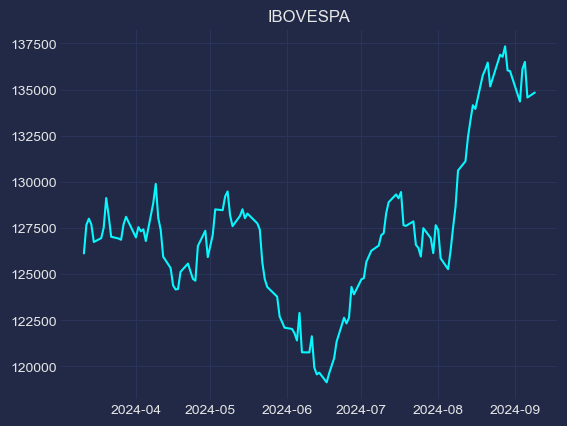

In [8]:
plt.plot(dados_mercado["IBOVESPA"])
plt.title("IBOVESPA")

plt.savefig("ibovespa.png")

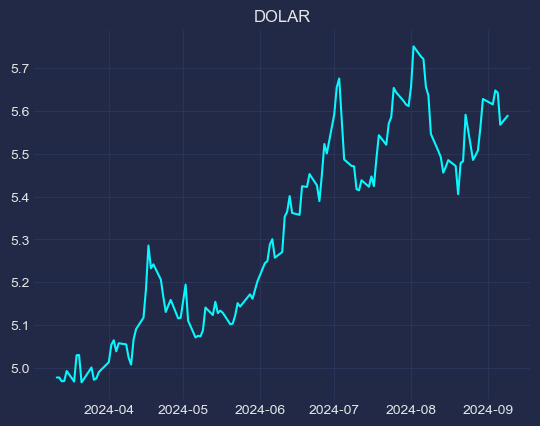

In [9]:
plt.plot(dados_mercado["DOLAR"])
plt.title("DOLAR")

plt.savefig("dolar.png")

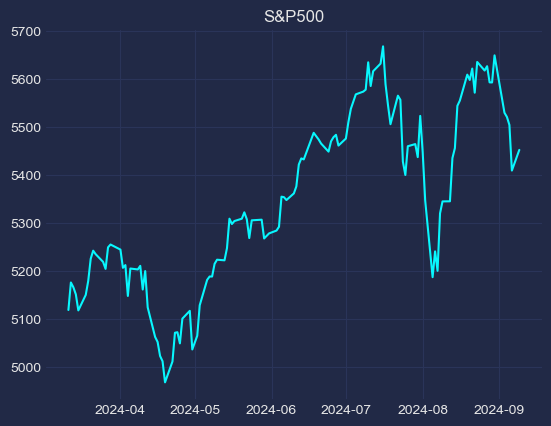

In [10]:
plt.plot(dados_mercado["S&P500"])
plt.title("S&P500")

plt.savefig("sp500.png")

##Passo 5 - Calcular retornos diários

In [11]:
retornos_diarios = dados_mercado.pct_change()
retornos_diarios

,DOLAR,IBOVESPA,S&P500
Date,,,
2024-03-11 00:00:00+00:00,NaN,NaN,NaN
2024-03-12 00:00:00+00:00,-0.000028,0.012242,0.011202
2024-03-13 00:00:00+00:00,-0.001748,0.002647,-0.001925
2024-03-14 00:00:00+00:00,0.000101,-0.002469,-0.002871
2024-03-15 00:00:00+00:00,0.004729,-0.007424,-0.006483
...,...,...,...
2024-09-03 00:00:00+00:00,-0.002239,-0.012139,-0.021151
2024-09-04 00:00:00+00:00,0.005770,0.013085,-0.001603
2024-09-05 00:00:00+00:00,-0.000974,0.002873,-0.003018


In [12]:
retorno_dolar = retornos_diarios['DOLAR'].iloc[-1]
retorno_ibovespa = retornos_diarios['IBOVESPA'].iloc[-1]
retorno_sp = retornos_diarios['S&P500'].iloc[-1]

In [13]:
retorno_dolar = str(round(retorno_dolar * 100,2)) + "%"
retorno_ibovespa = str(round(retorno_ibovespa * 100,2)) + "%"
retorno_sp = str(round(retorno_sp * 100,2)) + "%"
retorno_sp

'0.8%'

In [14]:
retorno_ibovespa

'0.2%'

In [15]:
retorno_dolar

'0.38%'

##Passo 6 - Configurar e enviar o e-mail

In [20]:
import win32com.client as win32

In [27]:
outlook = win32.Dispatch("outlook.application")

email = outlook.CreateItem(0)

In [28]:
email.To = "evento@varos.com.br"
email.Subject = "Relatório de Mercado"
email.body = f'''Prezado diretor, segue o relatório de mercado:

* O Ibovespa teve o retorno de {retorno_ibovespa}.
* O Dólar teve o retorno de {retorno_dolar}.
* O S&P500 teve o retorno de {retorno_sp}.

Segue em anexo a perfomance dos ativos nos últimos 6 meses.

Att,
Kauan da Silva.
    
'''

anexo_ibovespa = r"C:\Users\nauak\Documents\Estudo\Python\envio_de_relatorio\ibovespa.png"
anexo_dolar = r"C:\Users\nauak\Documents\Estudo\Python\envio_de_relatorio\dolar.png"
anexo_sp = r"C:\Users\nauak\Documents\Estudo\Python\envio_de_relatorio\sp500.png"

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)
email.Attachments.Add(anexo_sp)

email.Send()